In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-fulltext-and-category/bbc-text.csv


In [2]:
data=pd.read_csv('../input/bbc-fulltext-and-category/bbc-text.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [4]:
import nltk 
nltk.download('punkt')
import re 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#cleaning the dataset

import re
def process_test(sentences):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",sentences.lower()).split())

processed_sentences=[]
for item in range(data.shape[0]):
      processed_sentences.append(process_test(data['text'][item]))

In [6]:
data['processed_sentences']=processed_sentences

In [7]:
print(data['text'][0])
print('--------------------------------------------------\n')
print(data['processed_sentences'][0])

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

In [8]:
# def remove_stopwords(sen):
#     sen_new=''.join([i for i in sen if i not in stop_words])
    
#     return sen_new


def remove_stopwords(sen):

    
    sen_new=' '.join([ele for ele in sen.split() if ele not in stop_words])
    
    return sen_new

processed_sentences2=[]
for item in range(data.shape[0]):
      processed_sentences2.append(remove_stopwords(data['processed_sentences'][item]))


In [9]:
data['processed_sentences2']=processed_sentences2

In [10]:
data.head()

,category,text,processed_sentences,processed_sentences2
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


In [11]:
labels=list(data['category'])

In [12]:
type(labels)

list

preprocessing the dataset

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
#trunc_type = 'post'
#padding_type = 'post'
oov_tok = '<OOV>'
#training_portion = .8

In [15]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(processed_sentences2)
word_index=tokenizer.word_index
print(len(word_index))

32624


In [16]:
sequences=tokenizer.texts_to_sequences(processed_sentences2)
padded=pad_sequences(sequences,padding='post',maxlen=max_length)
print(len(padded[0]))
print(padded.shape)

120
(2225, 120)


In [17]:
type(padded)

numpy.ndarray

In [18]:
labels_tokenizer=Tokenizer()
labels_tokenizer.fit_on_texts(labels)
labels_word_index=labels_tokenizer.word_index
labels_sequence=np.array(labels_tokenizer.texts_to_sequences(labels))
#labels_sequence=np.array(labels_sequence)
#print(labels_sequence)
print(labels_word_index)

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [19]:
print(labels_sequence[0])
print(labels_sequence.shape)

[4]
(2225, 1)


In [20]:
type(labels_sequence)

numpy.ndarray

Building Model

In [21]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [22]:
?model.fit

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (iterations on a dataset).

Arguments:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sam

In [23]:
print(padded.shape)
print(labels_sequence.shape)
print(type(padded))
print(type(labels_sequence))

(2225, 120)
(2225, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
padded

array([[ 95,   1,   3, ..., 881,  71,  71],
       [  3,   1,  20, ...,   1,   1,   1],
       [  1, 138, 103, ...,   1,   1,   1],
       ...,
       [939,   1,   1, ...,  60, 328,  72],
       [  1, 511,   1, ...,   1,   1,   1],
       [  1, 863,   1, ..., 145,   1,   2]], dtype=int32)

In [26]:
num_epochs =30

history=model.fit(padded,
                  labels_sequence,
                  epochs=num_epochs,
                  
                  )

Epoch 1/30
70/70 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9452
Epoch 2/30
70/70 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.9524
Epoch 3/30
70/70 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9569
Epoch 4/30
70/70 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9604
Epoch 5/30
70/70 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.9663
Epoch 6/30
70/70 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9681
Epoch 7/30
70/70 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9739
Epoch 8/30
70/70 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9798
Epoch 9/30
70/70 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9798
Epoch 10/30
70/70 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9838
Epoch 11/30
70/70 [

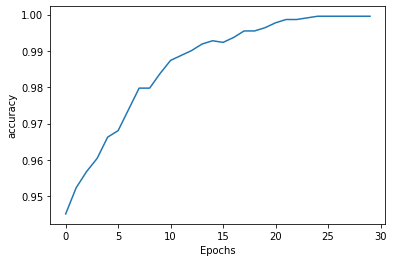

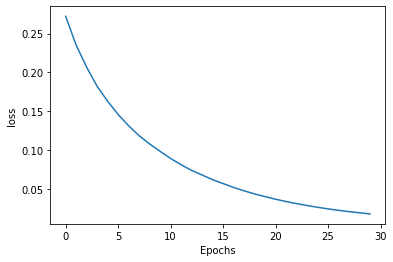

In [27]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
      plt.plot(history.history[string])
      #plt.plot(history.history['val_'+string])
      plt.xlabel("Epochs")
      plt.ylabel(string)
      #plt.legend([string, 'val_'+string])
      plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")